# DT Model – Sampling Comparison

In [6]:

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from models.train_dt import run
from models.utils import load_dataframe, split_features


In [7]:

MODEL = 'dt'
SAMPLINGS = ['none', 'under', 'smote']


In [8]:

results = {}
for samp in SAMPLINGS:
    print('Running sampling:', samp)
    results[samp] = run(samp)


Running sampling: none
Best params: {'clf__max_depth': 5, 'clf__min_samples_split': 2}
[DecisionTree[none]] precision=0.0109 recall=0.2857 auc=0.5071
Confusion Matrix:
 [[1677  542]
 [  15    6]]
Running sampling: under
Best params: {'clf__max_depth': None, 'clf__min_samples_split': 20}
[DecisionTree[under]] precision=0.0098 recall=0.6190 auc=0.4627
Confusion Matrix:
 [[ 899 1320]
 [   8   13]]
Running sampling: smote
Best params: {'clf__max_depth': None, 'clf__min_samples_split': 2}
[DecisionTree[smote]] precision=0.0370 recall=0.0476 auc=0.5180
Confusion Matrix:
 [[2193   26]
 [  20    1]]


In [9]:

metrics_df = pd.DataFrame(
    [{'sampling': samp, **metrics} for samp, metrics in results.items()]
)
metrics_df[['sampling', 'precision', 'recall', 'roc_auc']]


,sampling,precision,recall,roc_auc
0,none,0.010949,0.285714,0.507060
1,under,0.009752,0.619048,0.462692
2,smote,0.037037,0.047619,0.517951


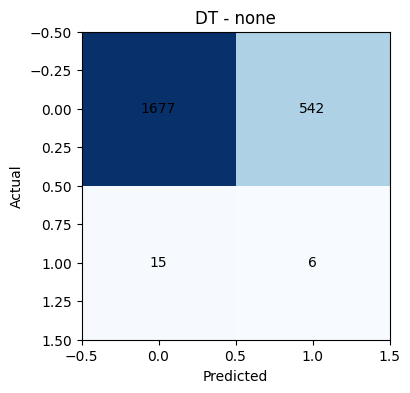

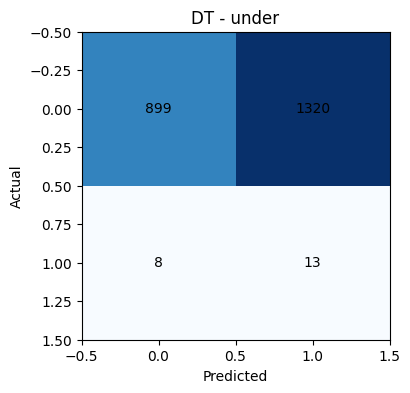

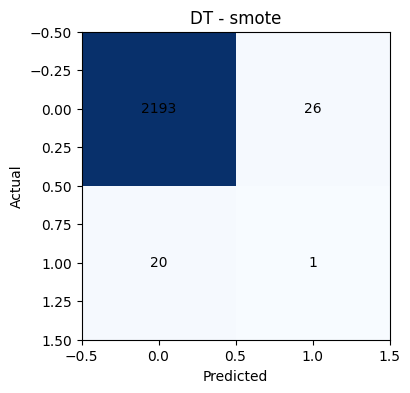

In [10]:

for samp, metrics in results.items():
    cm = metrics['confusion_matrix']
    plt.figure(figsize=(4, 4))
    plt.imshow(cm, cmap='Blues')
    plt.title(f"{MODEL.upper()} - {samp}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, cm[i][j], ha='center', va='center', color='black')
    plt.show()
